In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score

In [5]:
df=pd.read_excel("C:\\Users\\Tinotenda Mangarai\\Documents\\Clients\\Isabel\\NetOne data.xlsx")

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [6]:
df.head()

,Ticket ID,Date,Agent Name,MSISDN,LOCATION,Interaction Type,Interaction Details,Status,Comment
0,1.0,2023-06-02,Crystabel Khumalo,714067006.0,unknown,Prepaid,Bundle-to-airtime conversion/reversal,Closed,bundle in use
1,2.0,2023-06-02,Crystabel Khumalo,712998391.0,Mutoko,Prepaid,Voucher recharging failure/error,Closed,NaN
2,3.0,2023-06-02,Crystabel Khumalo,716392087.0,Tore,Mobile Financial Services,OneMoney PIN reset,Closed,KYC differs
3,4.0,2023-06-02,Crystabel Khumalo,717111828.0,Norton,Service/Product Support,PIN/PUK request,Closed,PUK provided
4,5.0,2023-06-02,Crystabel Khumalo,716520558.0,Chitungwiza,Data,4G/LTE activation,Closed,refreshed LTE


In [7]:
df.shape

(1857, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Ticket ID             1855 non-null   float64       
 1   Date                  1824 non-null   datetime64[ns]
 2   Agent Name            1825 non-null   object        
 3   MSISDN                1824 non-null   float64       
 4   LOCATION              1769 non-null   object        
 5   Interaction Type      1823 non-null   object        
 6   Interaction Details   1823 non-null   object        
 7   Status                1825 non-null   object        
 8   Comment               1818 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 130.7+ KB


In [26]:
# Checking for duplicates
duplicates = df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the duplicates
print("Number of duplicates:", num_duplicates)
print("Duplicate rows:")
print(df[duplicates])

Number of duplicates: 0
Duplicate rows:
Empty DataFrame
Columns: [Ticket ID, Date, Agent Name, MSISDN, LOCATION, Interaction Type, Interaction Details , Status, Comment]
Index: []


In [25]:
df.isna().sum()

Ticket ID                2
Date                    33
Agent Name              32
MSISDN                  33
LOCATION                88
Interaction Type        34
Interaction Details     34
Status                  32
Comment                 39
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df.shape


(1759, 9)

In [29]:
df.isna().sum()

Ticket ID               0
Date                    0
Agent Name              0
MSISDN                  0
LOCATION                0
Interaction Type        0
Interaction Details     0
Status                  0
Comment                 0
dtype: int64

In [70]:
# Renaming columns 
df = df.rename(columns={
    'Interaction Type': 'Customer Issue Category',
    'Interaction Details ': 'Customer Issue Description',
    'Status': 'Status of the Customer Issue'
})

# Verify the column names have been updated
print(df.columns)

Index(['Ticket ID', 'Date', 'Agent Name', 'MSISDN', 'LOCATION',
       'Customer Issue Category', 'Customer Issue Description',
       'Status of the Customer Issue', 'Comment'],
      dtype='object')


In [71]:
df.head()

,Ticket ID,Date,Agent Name,MSISDN,LOCATION,Customer Issue Category,Customer Issue Description,Status of the Customer Issue,Comment
0,1.0,2023-06-02,Crystabel Khumalo,714067006.0,unknown,Prepaid,Bundle-to-airtime conversion/reversal,Closed,bundle in use
2,3.0,2023-06-02,Crystabel Khumalo,716392087.0,Tore,Mobile Financial Services,OneMoney PIN reset,Closed,KYC differs
3,4.0,2023-06-02,Crystabel Khumalo,717111828.0,Norton,Service/Product Support,PIN/PUK request,Closed,PUK provided
4,5.0,2023-06-02,Crystabel Khumalo,716520558.0,Chitungwiza,Data,4G/LTE activation,Closed,refreshed LTE
5,6.0,2023-06-02,Crystabel Khumalo,712702293.0,Chitungwiza,Data,Data connectivity challenges,Closed,gprs refreshed


# EDA 

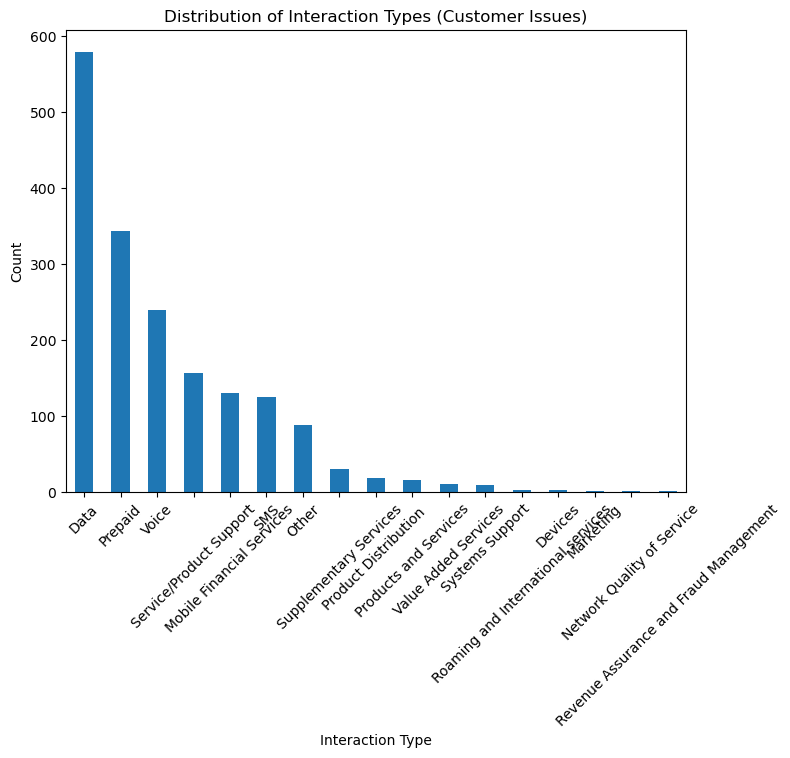

In [53]:
# Interaction type counts
interaction_types = df['Interaction Type'].value_counts()

# Plot the distribution of interaction types
plt.figure(figsize=(8, 6))
interaction_types.plot(kind='bar')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.title('Distribution of Interaction Types (Customer Issues)')
plt.xticks(rotation=45)
plt.show()

In [72]:
import pandas as pd
import plotly.express as px

# interaction counts
interaction_types = df['Customer Issue Category'].value_counts()

# Create a bar chart using Plotly
fig = px.bar(interaction_types, x=interaction_types.index, y=interaction_types.values)
fig.update_layout(
    title='Distribution of the Categories of Customer Issues',
    xaxis_title='',
    yaxis_title='Frequency'
)
fig.show()

In [65]:
# Bar plot: Location
locations = df['LOCATION'].value_counts()

# Create a bar chart using Plotly
fig = px.bar(locations, x=locations.index, y=locations.values)
fig.update_layout(
    title='Distribution of Locations From which Issues were reported from',
    xaxis_title='',
    yaxis_title='Frequency'
)
fig.show()

In [66]:
locations


unknown         200
Chitungwiza      80
Bulawayo         70
Harare           57
Domboshava       38
               ... 
Mayville          1
Murombedzi        1
Matogo            1
Ashdown park      1
madokero          1
Name: LOCATION, Length: 271, dtype: int64

In [74]:
# Status
status = df['Status of the Customer Issue'].value_counts()

# Create a pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=status.index, values=status.values, hole=0.3)])

fig.update_layout(
    title='Distribution of the Status of Customer Issues',
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)
fig.show()

In [59]:
# Bar chart: Comment
comments = df['Comment'].value_counts()

# Create a bar chart using Plotly
fig = px.bar(comments, x=comments.index, y=comments.values)
fig.update_layout(
    title='Distribution of the Comments on Customer Issues',
    xaxis_title='',
        yaxis_title='Frequency'
)
fig.show()

In [75]:
import pandas as pd
import plotly.express as px

# Assuming you have loaded the data into a pandas DataFrame called 'df'
df_filtered = df.dropna(subset=['Customer Issue Category', 'LOCATION'])

# Calculate the count of each combination of interaction type and location
interaction_location_counts = df_filtered.groupby(['Customer Issue Category', 'LOCATION']).size().reset_index(name='Count')

# Create a bar chart using Plotly
fig = px.bar(interaction_location_counts, x='Customer Issue Category', y='Count', color='LOCATION')

fig.update_layout(
    title='Customer Issue Category and Location',
    xaxis_title='Customer Issue Category',
    yaxis_title='Count'
)

fig.show()

# SelectKBest to select relevat features 

In [76]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant columns
data = df.drop(['Ticket ID', 'Date', 'Agent Name'], axis=1)

# Perform label encoding for object variables
label_encoder = LabelEncoder()

for column in data.select_dtypes(include='object'):
    data[column] = label_encoder.fit_transform(data[column])

# Perform feature selection using SelectKBest and f_classif
X = data.drop('Customer Issue Category', axis=1)
y = data['Customer Issue Category']

selector = SelectKBest(score_func=f_classif, k=5)  # Adjust the value of k as desired
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices].tolist()

# Get the scores of the selected features
feature_scores = selector.scores_[selected_feature_indices]

# Create a DataFrame with selected feature names and scores
selected_features_df = pd.DataFrame({'Feature': selected_feature_names, 'Score': feature_scores})

# Print the selected features and their scores
print("Selected Features and Scores:")
print(selected_features_df)

Selected Features and Scores:
                        Feature      Score
0                        MSISDN   0.353033
1                      LOCATION  21.554574
2    Customer Issue Description  84.545163
3  Status of the Customer Issue   0.255343
4                       Comment  21.022585


# Mutual Information Scores to Select Relevant Features

Text(0.5, 0, 'Mutual Information Score')

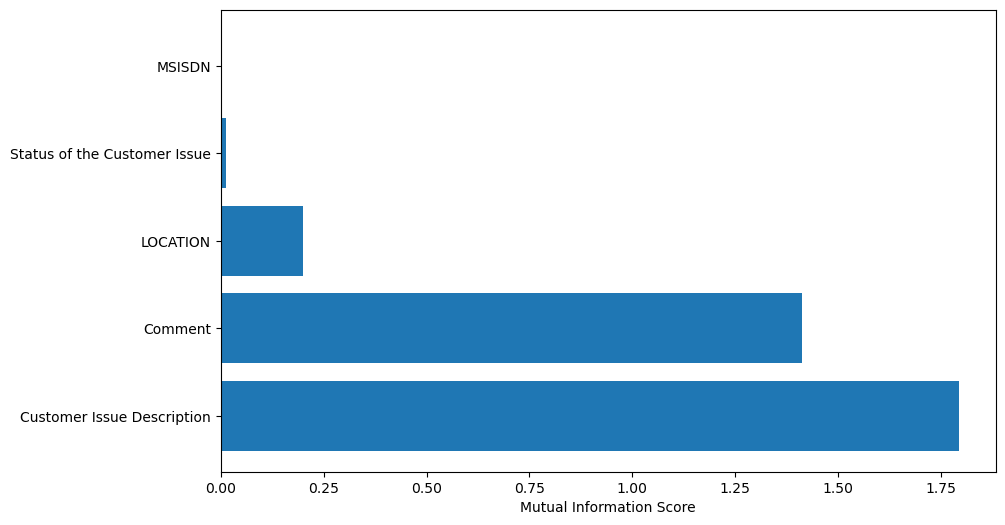

In [79]:
# Perform feature selection using SelectKBest and f_classif
X = data.drop('Customer Issue Category', axis=1)
y = data['Customer Issue Category']

# Calculating mutual information scores 
mi_scores = mutual_info_regression(X, y)
# Create a DataFrame with feature names and mutual information scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort the DataFrame by MI Score in descending order
mi_df = mi_df.sort_values('MI Score', ascending=False)

# Plot the mutual information scores
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['MI Score'])
plt.xlabel('Mutual Information Score')

The selected features: customer issue description, comment on customer issue, location

In [41]:
# Building the feature space and target variable 
X=df[['LOCATION', 'Comment', 'Customer Issue Description']]
y=df['ICustomer Issue Category']

In [42]:
# Perform label encoding for object variables
label_encoder = LabelEncoder()

for column in X.select_dtypes(include='object'):
    X[column] = label_encoder.fit_transform(X[column])

C:\Users\Tinotenda Mangarai\AppData\Local\Temp\ipykernel_17496\1047775959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\Tinotenda Mangarai\AppData\Local\Temp\ipykernel_17496\1047775959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\Tinotenda Mangarai\AppData\Local\Temp\ipykernel_17496\1047775959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

# Random Forest Classifier 

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Building the feature space and target variable 
X=df[['LOCATION', 'Comment', 'Customer Issue Description']]
y=df['Customer Issue Category']

# Perform label encoding for object variables
label_encoder = LabelEncoder()

for column in X.select_dtypes(include='object'):
    X[column] = label_encoder.fit_transform(X[column])
    
    
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9346590909090909
Precision: 0.9225078907529419
Recall: 0.9346590909090909
F1-Score: 0.9276926737316541


C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter Tuning 

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Building the feature space and target variable 
X=df[['LOCATION', 'Comment', 'Customer Issue Description']]
y=df['Customer Issue Category']

# Perform label encoding for object variables
label_encoder = LabelEncoder()

for column in X.select_dtypes(include='object'):
    X[column] = label_encoder.fit_transform(X[column])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best classifier
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the accuracy of the best classifier
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)

# Save the model
model.save("best_rf_classifier.h5")


C:\Users\Tinotenda Mangarai\AppData\Local\Temp\ipykernel_17496\2511938737.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Tinotenda Mangarai\AppData\Local\Temp\ipykernel_17496\2511938737.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Tinotenda Mangarai\AppData\Local\Temp\ipykernel_17496\2511938737.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.913295979404861
Accuracy: 0.9460227272727273


C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [85]:
# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9460227272727273
Precision: 0.9310790732362584
Recall: 0.9460227272727273
F1-Score: 0.937478405051688


C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [48]:
# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
                                        precision    recall  f1-score   support

                                  Data       0.96      0.98      0.97       123
                               Devices       0.00      0.00      0.00         1
                             Marketing       0.00      0.00      0.00         1
             Mobile Financial Services       0.96      0.92      0.94        26
            Network Quality of Service       0.00      0.00      0.00         0
                                 Other       1.00      0.88      0.94        17
                               Prepaid       0.96      0.97      0.97        76
                 Product Distribution        0.50      1.00      0.67         2
                 Products and Services       0.00      0.00      0.00         1
Revenue Assurance and Fraud Management       0.00      0.00      0.00         1
    Roaming and International services       0.00      0.00      0.00         1
                

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tinotenda Manga

In [84]:
# Get feature importances
feature_importances = best_rf_classifier.feature_importances_

# Get individual tree characteristics
n_estimators = best_rf_classifier.n_estimators
max_depth = best_rf_classifier.max_depth
max_features = best_rf_classifier.max_features

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Print the individual tree characteristics
print("Individual Tree Characteristics:")
print(f"Number of Trees (n_estimators): {n_estimators}")
print(f"Maximum Tree Depth (max_depth): {max_depth}")
print(f"Number of Features Considered (max_features): {max_features}")

Feature Importances:
LOCATION: 0.1618289387066707
Comment: 0.3301488945176473
Customer Issue Description: 0.5080221667756821
Individual Tree Characteristics:
Number of Trees (n_estimators): 200
Maximum Tree Depth (max_depth): None
Number of Features Considered (max_features): sqrt


C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklea

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

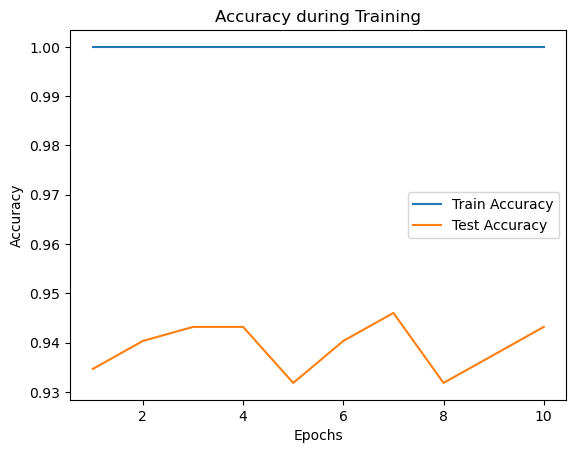

In [50]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params)

# Lists to store accuracy and loss values during training
train_accuracy = []
test_accuracy = []

# Train the classifier and track accuracy at each iteration
for epoch in range(10):
    best_rf_classifier.fit(X_train, y_train)
    
    # Make predictions on the train and test set
    train_predictions = best_rf_classifier.predict(X_train)
    test_predictions = best_rf_classifier.predict(X_test)
    
    # Calculate accuracy for train and test set
    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)
    
    # Append accuracy values to the lists
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# Plot accuracy during training
plt.plot(range(1, 11), train_accuracy, label='Train Accuracy')
plt.plot(range(1, 11), test_accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy during Training')
plt.legend()
plt.show()

In [52]:
best_score

0.911869967946291

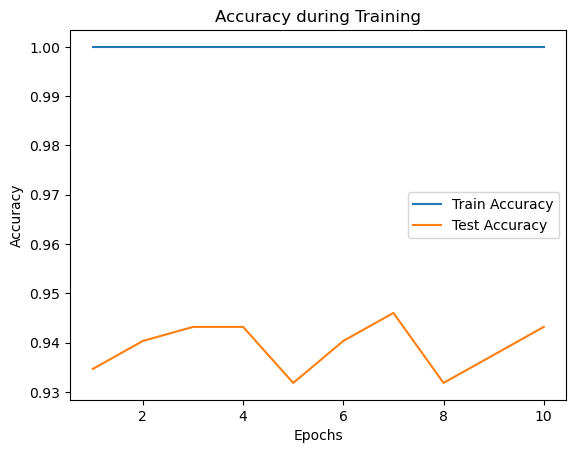

In [51]:
# Plot accuracy during training
plt.plot(range(1, 11), train_accuracy, label='Train Accuracy')
plt.plot(range(1, 11), test_accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy during Training')
plt.legend()
plt.show()

In [86]:
model.save("best_rf_classifier.h5")

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

